<a href="https://colab.research.google.com/github/rahiakela/math-for-programmers/blob/main/2-drawing-with-2d-vectors/2_plane_vector_arithmetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plane vector arithmetic

A two-dimensional (2D) object is flat like an image on a piece of paper or a computer screen. It has only the dimensions of height and width. A
three-dimensional (3D) object in our physical world, however, has not only height and width but also depth.

Even though our everyday experience takes place in three dimensions, it's useful to think of some data as higher dimensional. In physics, it’s common to consider time as the fourth dimension. While an object exists at a location in 3D space, an event occurs at a 3D location and at a specified moment. In data science problems, it’s common for data sets to have far more dimensions.

Grappling with these problems in graphics, physics, and data analysis requires a framework for dealing with data in higher dimensions. This framework is vector mathematics.

Vectors are objects that live in multi-dimensional spaces. These have their own
notions of arithmetic (adding, multiplying, and so on).



## Setup

In [1]:
!wget https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/2-drawing-with-2d-vectors/vector_drawing.py

--2021-01-02 14:23:30--  https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/2-drawing-with-2d-vectors/vector_drawing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4645 (4.5K) [text/plain]
Saving to: ‘vector_drawing.py’

vector_drawing.py   100%[===================>]   4.54K  --.-KB/s    in 0s      

2021-01-02 14:23:30 (65.0 MB/s) - ‘vector_drawing.py’ saved [4645/4645]



In [2]:
from math import sqrt
from vector_drawing import * 

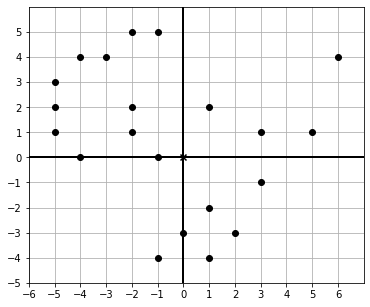

In [3]:
# we can draw the points outlining the dinosaur
dino_vectors = [
  (6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
  (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
  (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)          
]

draw(Points(*dino_vectors))

## Introduction

Like numbers, vectors have their own kind of arithmetic; we can combine vectors with operations to make new vectors. The difference with vectors is that we can visualize the results. Operations from vector arithmetic all accomplish useful geometric transformations, not just algebraic ones. We’ll start with the most basic operation: **vector addition**.

Vector addition is simple to calculate: given two input vectors, you add their
x-coordinates to get the resulting x-coordinate and then you add their y-coordinates to get the resulting y-coordinate. Creating a new vector with these summed coordinates gives you the vector sum of the original vectors. For instance, `(4, 3) + (–1, 1) = (3, 4)` because `4 + (–1) = 3` and `3 + 1 = 4`.

Vector addition is a one-liner to implement in Python:



In [4]:
def add(v1, v2):
  return (v1[0] + v2[0], v1[1] + v2[1])

In [5]:
v1 = [4, 3]
v2 = [-1, 1]
add(v1, v2)

(3, 4)

Because we can interpret vectors as arrows or as points in the plane, we can visualize the result of the addition in both ways. As a point in the plane, you can reach `(–1, 1)` by starting at the origin, which is `(0, 0)`, and move one unit to the left and one unit up. You reach the vector sum of `(4, 3) + (–1, 1)` by starting instead at `(4, 3)` and moving one unit to the left and one unit up. This is the same as saying you traverse one arrow and then traverse the second arrow, in other words, you have moved forward.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/vector-sum.png?raw=1' width='800'/>

The rule for vector addition of arrows is sometimes called tip-to-tail addition. That’s because if you move the tail of the second arrow to the tip of the first (without changing its length or direction!), then the sum is the arrow from the start of the first to the end of the second.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/tip-to-tail.png?raw=1' width='800'/>

When we talk about arrows, we really mean “a specific distance in a specific direction.” If you walk one distance in one direction andanother distance in  another direction, the vector sum tells you the overall distance and
direction you traveled.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/vector-sum-distance.png?raw=1' width='800'/>

**Adding a vector has the effect of moving or translating an existing point or collection of points.**

If we add the vector `(–1.5, –2.5)` to every vector of dino_vectors, we get a new list of vectors, each of which is `1.5` units left and `2.5` units down from one of the original vectors.



In [6]:
dino_vectors2 = [add((-1.5, -2.5), v) for v in dino_vectors]

The result is the same dinosaur shape shifted down and to the left by the vector `(–1.5, –2.5)`.

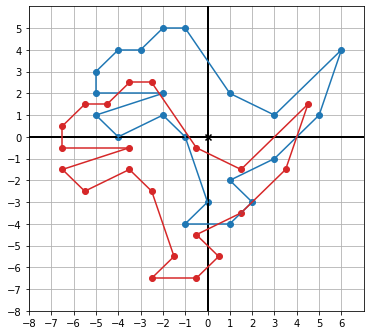

In [7]:
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red)
)

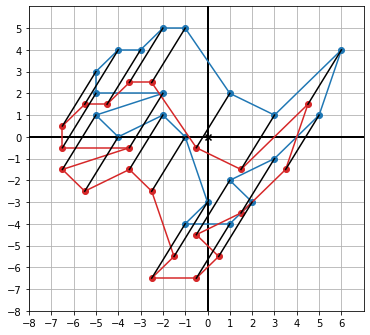

In [8]:
arrows = [Segment(tip, tail, color=black) for tip, tail in zip(dino_vectors2, dino_vectors)]

draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red),
    *arrows
)

A translation like this is useful if, for instance, we want to make the dinosaur a moving character in a 2D computer game. Depending on the button pressed by the user, the dinosaur could translate in the corresponding direction
on the screen.

## Vector components and lengths

Sometimes it’s useful to take a vector we already have and decompose it as a sum of smaller vectors. For example, if I were asking for walking directions in New York City, it would be much more useful to hear “go four blocks east and three blocks north” rather than “go 800 meters northeast.” **Similarly, it can be useful to think of vectors as a sum of a vector pointing in the x direction and a vector pointing in the y direction.**

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/breaking-vector.png?raw=1' width='800'/>

As an example, the vector (4, 3) rewritten as the sum (4, 0) +
(0, 3). Thinking of the vector (4, 3) as a navigation path in the plane, the sum (4, 0) + (0, 3) gets us to the same point along a different path.

The two vectors (4, 0) and (0, 3) are called the x and y components, respectively. If you couldn’t walk diagonally in this plane (as if it were New York City), you would need to walk four units to the right and then three units up to get to the same destination, a total of seven units.

The length of a vector is the length of the arrow that represents it, or equivalently, the distance from the origin to the point that represents it.

You may recall the relevant formula: the Pythagorean theorem. For a right triangle (a triangle having two sides meeting at a 90° angle), the Pythagorean theorem says that the square of the length of the longest side is the sum of squares of the lengths of the other two sides. The longest side is called the hypotenuse, and its length is denoted by $c$ in the memorable formula $a^2 + b^2 = c^2$, where a and $b$ are the lengths of the other two
sides. With $a = 4$ and $b = 3$, we can find $c$ as the square root of `42 + 32`.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/pythagorean-theorem.png?raw=1' width='800'/>

Breaking a vector into components is handy because it always gives us a right triangle. If we know the lengths of the components, we can compute the length of the hypotenuse, which is the length of the vector.

We can translate this formula into a length function in Python, which takes a 2D vector and returns its floating-point length:



In [9]:
def length(v):
  return sqrt(v[0] ** 2 + v[1] ** 2)

In [10]:
v = [3, 7]
print(length(v))

7.615773105863909


## Multiplying vectors by numbers

Repeated addition of vectors is unambiguous; you can keep stacking arrows tip-to-tail as long as you want. If a vector named v has coordinates (2, 1), then the fivefold sum v + v + v + v + v would look like that.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/repeated-addition.png?raw=1' width='800'/>

If v were a number, we wouldn’t bother writing v + v + v + v + v. Instead, we’d write the simpler product 5 · v. There’s no reason we can’t do the same for vectors. The result of adding v to itself 5 times is a vector in the same direction but with 5 times the length. We can run with this definition,
which lets us multiply a vector by any whole or fractional number.



In [11]:
v = [2, 1]
v = v + v + v + v + v
print(v)

[2, 1, 2, 1, 2, 1, 2, 1, 2, 1]


In [12]:
def scale(v, scalar):
  return (scalar * v[0], scalar * v[1])

print(scale(v, 5))

(10, 5)


<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/scalar-multiplication.png?raw=1' width='400'/>

**The operation of multiplying a vector by a number is called scalar multiplication. When working with vectors, ordinary numbers are often called scalars. It’s also an appropriate term because the effect of this operation is
scaling the target vector by the given factor.** It doesn’t matter if the scalar is a whole number; we can easily draw a vector that is 2.5 times the length of another.


In [13]:
v = [1, 1]
print(scale(v, 2.5))

(2.5, 2.5)


The result on the vector components is that each component is scaled by the same
factor. You can picture scalar multiplication as changing the size of the right
triangle defined by a vector and its components, but not affecting its aspect ratio. we can superimposes a vector v and its scalar multiple 1.5 · v, where the scalar multiple is 1.5 times as long. Its components are also 1.5 times the length of the original components of v.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/scalar-multiplication2.png?raw=1' width='800'/>

In [14]:
v = [6, 4]
print(scale(v, 1.5))

(9.0, 6.0)


In coordinates, the scalar multiple of `1.5` times the vector `v = (6, 4)` gives us a new vector `(9, 6)`, where each component is `1.5` times its original value. Computationally, we execute any scalar multiplication on a vector by multiplying each coordinate of the vector by the scalar. As a second example, scaling a vector `w = (1.2, –3.1)` by a factor `6.5` can be accomplished like this:

```python
6.5 · w = 6.5 · (1.2, –3.1) = (6.5 · 1.2, 6.5 · –3.1) = (7.8, –20.15)
```

In [15]:
w = [1.2, -3.1]
print(scale(w, 6.5))

(7.8, -20.150000000000002)


We tested this method for a fractional number as the scalar, but we should also test a negative number. If our original vector is (6, 4), what is –½ times that vector? Multiplying the coordinates, we expect the answer to be (–3, –2).This vector is half the length of the original and points in the opposite direction.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/scalar-multiplication3.png?raw=1' width='800'/>

In [16]:
w = [6, 4]
print(scale(w, -0.5))

(-3.0, -2.0)


## Subtraction, displacement, and distance

Scalar multiplication agrees with our intuition for multiplying numbers. A whole
number multiple of a number is the same as a repeated sum, and the same holds for vectors. We can make a similar argument for negative vectors and vector subtraction.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/vector-opposite.png?raw=1' width='800'/>

Given a vector $v$, the opposite vector, $–v$, is the same as the scalar multiple $–1 · v$. If $v$ is `(–4, 3)`, its opposite, $–v$, is `(4, –3)`. We get this by multiplying each coordinate by `–1`, or in other words, changing the sign of each.

**On the number line, there are only two directions from zero: positive and negative.** In the plane, there are many directions (infinitely many, in fact), so we can’t say that one of $v$ and $–v$ is positive while the other is negative. What we can say is that for any vector v, the opposite vector $–v$ will have the same length, but it will point in the opposite direction.



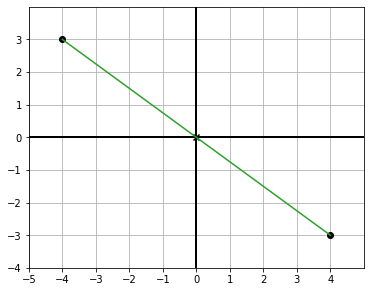

In [17]:
draw(
    Points((-4, 3), (4, -3)),
    Segment((-4, 3), (4, -3), color=green)
)

**Having a notion of negating a vector, we can define vector subtraction.** For numbers, $x – y$ is the same as $x + (–y)$. We set the same convention for vectors. To subtract a vector $w$ from a vector $v$, you add the vector $–w$ to $v$. Thinking of vectors $v$ and $w$ as points, $v – w$ is the position of $v$ relative to $w$. Thinking instead of $v$ and $w$ as arrows beginning at the origin.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/vector-subtracting.png?raw=1' width='800'/>

The coordinates of $v – w$ are the differences of the coordinates $v$ and $w$.
$v = (–1, 3)$ and $w = (2, 2)$. The difference for $v – w$ has the coordinates $(–1 – 2, 3 – 2) = (–3, 1)$.

In [18]:
v = [-1, 3]
w = [2, 2]

add(v, scale(w, -1))

(-3, 1)

Let’s look at the difference of the vectors $v = (–1, 3)$ and $w = (2, 2)$ again.

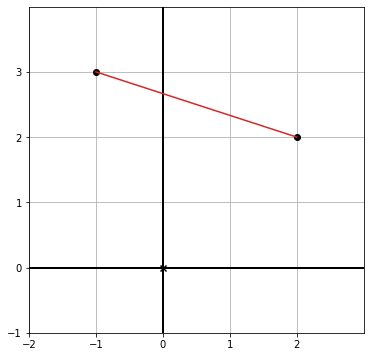

In [19]:
draw(
    Points((2, 2), (-1, 3)),
    Segment((2, 2), (-1, 3), color=red)
)

**The difference for the vectors $v – w = (–3, 1)$ tells us that if we start at point $w$, we need to go three units left and one unit up to get to point $v$. This vector is sometimes called the displacement from $w$ to $v$.** The straight, red line segment from $w$ to $v$ shows the distance between the two points.

The length of the line segment is computed with the Pythagorean theorem as follows:

$$a^2 + b^2 = c^2$$
$$c = \sqrt{a^2 + b^2}$$
$$\sqrt{(-3)^2 + 1^2} = \sqrt{9 + 1} = \sqrt{10} = 3.162...$$

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/several-points.png?raw=1' width='800'/>

While the displacement is a vector, the distance is a scalar (a single
number). The distance on its own is not enough to specify how to get
from $w$ to $v$; there are plenty of points that have the same distance
from $w$.

## Exercises

**Ex-1**: If the vector u = (–2, 0), the vector v = (1.5, 1.5), and the vector w
= (4, 1), what are the results of u + v, v + w, and u + w? What is the result of
u + v + w?

In [20]:
u = [-2, 0]
v = [1.5, 1.5]
w = [4, 1]

print(add(u, v))

(-0.5, 1.5)


In [21]:
print(add(v, w))

(5.5, 2.5)


In [22]:
print(add(u, w))

(2, 1)


In [23]:
print(add(add(u, v), w))

(3.5, 2.5)


**Ex-2**: You can add any number of vectors together by summing all of their x-coordinates and all of their y-coordinates. For instance, the fourfold sum `(1, 2) + (2, 4) + (3, 6) + (4, 8)` has x component `1 + 2 + 3 + 4 =
10` and y component `2 + 4 + 6 + 8 = 20`, making the result `(10, 20)`. Implement a revised add function that takes any number of vectors as arguments.

In [24]:
def addition(*vectors):
  return (sum([v[0] for v in vectors]), sum([v[1] for v in vectors]))

In [25]:
v1 = [1, 2] 
v2 = [2, 4]
u1 = [3, 6] 
u2 = [4, 8]  

print(addition(v1, v2, u1, u2))

(10, 20)


**Ex-3**: Write a function translate(translation, vectors) that
takes a translation vector and a list of input vectors, and returns a list of the input vectors all translated by the translation vector. For instance, translate `((1,1), [(0,0), (0,1,), (–3,–3)])` should return `[(1,1),(1,2),(–2,
–2)]`.

In [26]:
def translate(tanslator, vectors):
  return [add(tanslator, v) for v in vectors]

translator = [1, 1]
vectors = [
  [0, 0],
  [0, 1],
  [-3, -3]         
]

translate(translator, vectors)

[(1, 1), (1, 2), (-2, -2)]

**Ex-4**: Any sum of vectors v + w gives the same result as w + v. Explain why this is true using the definition of the vector sum on coordinates.
Also, draw a picture to show why it is true geometrically.

In [27]:
v = [2, 3]
w = [4, 3]

print(add(v, w))

(6, 6)


In [28]:
print(add(w, v))

(6, 6)


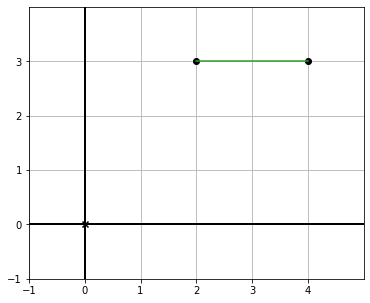

In [29]:
draw(
    Points((2, 3), (4, 3)),
    Segment((2, 3), (4, 3), color=green)
)

**Ex-5**: Write a Python function using vector addition to
show 100 simultaneous and non-overlapping copies of the dinosaur. This shows
the power of computer graphics; imagine how tedious it would be to specify all
2,100 coordinate pairs by hand!

In [30]:
def hundred_dinos():
  translations = [(12 * x,  12 * y) for x in range(-5, 5) for y in range(-5, 5)]
  dinos = [Polygon(*translate(t, dino_vectors), color=blue) for t in translations]
  draw(*dinos, grid=None, axes=None, origin=None)

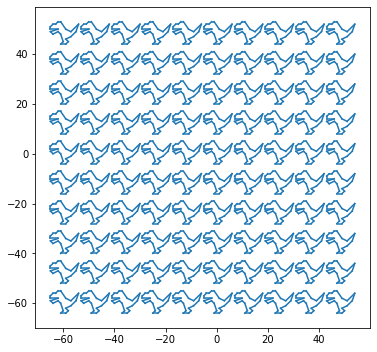

In [31]:
hundred_dinos()

**Ex-6**: Which is longer, the x or y component of (3, –2) + (1, 1) +
(–2, –2)?

In [32]:
addition((3, -2), (1, 1), (-2, -2))

(2, -3)

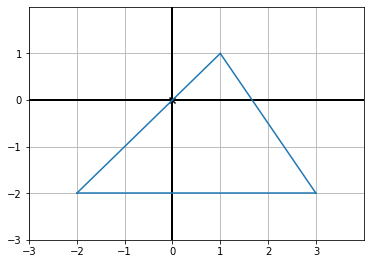

In [33]:
draw(Polygon((3, -2), (1, 1), (-2, -2)))

**Ex-7**: What are the components and lengths of the vectors (–6, –6)
and (5, –12)?

In [34]:
length((-6, -6))

8.48528137423857

In [35]:
length((5, -12))

13.0

**Ex-8**: Suppose I have a vector v that has a length of 6 and an x component
(1, 0). What are the possible coordinates of v?

In [36]:
# c^2 = a^2 + b^2
# 6^2 = 1^2 + b^2
b = 6 ** 2 - 1 ** 2
b

35

**Ex-9**: What vector in the dino_vectors list has the longest length?
Use the length function we wrote to compute the answer quickly.

In [37]:
max(dino_vectors, key=length)

(6, 4)

**Ex-2.16**: Suppose a vector w has the coordinates $(\sqrt{2}, \sqrt{3})$. What are the
approximate coordinates of the scalar multiple $\pi$ · w? Draw an approximation of the original vector and the new vector.

In [42]:
from math import sqrt

w = [sqrt(2), sqrt(3)]
_w = scale(w, pi)
_w

(4.442882938158366, 5.441398092702653)

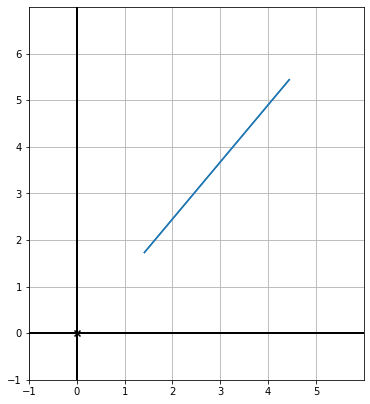

In [52]:
draw(Polygon(w, _w))